In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers # importing regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf


In [23]:
tokenizer = Tokenizer()
data = open('/content/dataforpoem.txt').read()

corpus = data.lower().split("\\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
 	token_list = tokenizer.texts_to_sequences([line])[0]
 	for i in range(1, len(token_list)):
 		n_gram_sequence = token_list[:i+1]
 		input_sequences.append(n_gram_sequence)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and 
# all but last is input and last word of the list is label
#one hot encoding of the tokedns
predictors, label = input_sequences[:,:-1],input_sequences[:,-1] 
label = ku.to_categorical(label, num_classes=total_words)
print(corpus)


['let the bird of loudest lay', 'on the sole arabian tree', 'herald sad and trumpet be,', 'to whose sound chaste wings obey.', 'but thou shrieking harbinger,', 'foul precurrer of the fiend,', "augur of the fever\\'s end,", 'to this troop come thou not near.', 'from this session interdict', 'every fowl of tyrant wing,', "save the eagle, feather\\'d king;", 'keep the obsequy so strict.', 'let the priest in surplice white,', 'that defunctive music can,', 'be the death-divining swan,', 'lest the requiem lack his right.', 'and thou treble-dated crow,', "that thy sable gender mak\\'st", "with the breath thou giv\\'st and tak\\'st,", "\\'mongst our mourners shalt thou go.", 'here the anthem doth commence:', 'love and constancy is dead;', 'phoenix and the turtle fled', 'in a mutual flame from hence.', "so they lov\\'d, as love in twain", 'had the essence but in one;', 'two distincts, division none:', 'number there in love was slain.', 'hearts remote, yet not asunder;', 'distance and no space w

In [24]:

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1] # all but last is input and last word of the list is label
#one hot encoding of the tokedns
label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [25]:

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1] # all but last is input and last word of the list is label
#one hot encoding of the tokedns
label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [26]:
#Week 4
#Lstm model to generate poem
model = tf.keras.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # here change 100 to get better results
model.add(Bidirectional(LSTM(150, return_sequences = True))) #to reduce repetition...150 could be changed for better redults
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
#setting up own adam optimiser
adam = Adam(learning_rate=0.001)#could be finetuned
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           347600    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1738)              175538    
_________________________________________________________________
dense_5 (Dense)              (None, 3476)              6044764   
Total params: 7,029,502
Trainable params: 7,029,502
Non-trainable params: 0
____________________________________________

In [27]:
history = model.fit(predictors, label, epochs=100, verbose=1) #longer epochs would be fine

Epoch 1/100
330/330 [==============================] - 9s 16ms/step - loss: 7.8155 - accuracy: 0.0297
Epoch 2/100
330/330 [==============================] - 5s 16ms/step - loss: 6.7582 - accuracy: 0.0375
Epoch 3/100
330/330 [==============================] - 5s 16ms/step - loss: 6.6439 - accuracy: 0.0366
Epoch 4/100
330/330 [==============================] - 5s 16ms/step - loss: 6.4958 - accuracy: 0.0327
Epoch 5/100
330/330 [==============================] - 5s 16ms/step - loss: 6.4644 - accuracy: 0.0350
Epoch 6/100
330/330 [==============================] - 5s 15ms/step - loss: 6.3515 - accuracy: 0.0397
Epoch 7/100
330/330 [==============================] - 5s 15ms/step - loss: 6.3308 - accuracy: 0.0332
Epoch 8/100
330/330 [==============================] - 5s 15ms/step - loss: 6.2444 - accuracy: 0.0382
Epoch 9/100
330/330 [==============================] - 5s 15ms/step - loss: 6.1722 - accuracy: 0.0404
Epoch 10/100
330/330 [==============================] - 5s 15ms/step - loss: 6.102

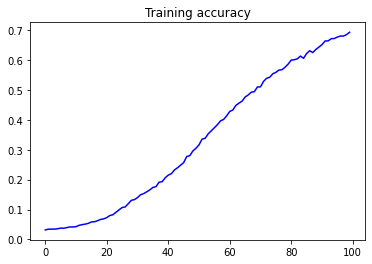

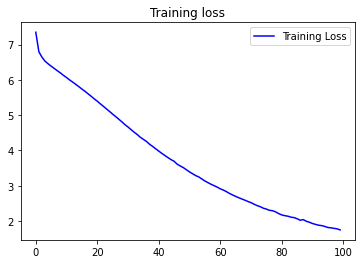

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [30]:
seed_text = "This is a starter sentence."
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This is a starter sentence. of the lord of life and light before it before her shoulder for more is to her love is favor seemd their right have slaine your love should wind to vouchsafe in woe did hide begin to wink and doth winged fountaine welled forth nor way without show therefore your stroke down for his chiefest hight to adorne to mourne to be gon gon to vouchsafe in vile disdaine had didst mar nor wandering dearest and her huge bright is without pitteous posterity can well rew his cat hath birds exceeding a sight knows silver quicksilver sweat wilt lie delight


In [32]:
model.save("mymod.h5")